In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 課題1
## 2変数正規分布に従う乱数をプロットする
- そのままプロット
- 標準化してプロット
    - サンプルからのμ, Σを使用して計算
    - パラメータからのμ, Σを使用して計算
- 無相関化してプロット

In [11]:
def standardize(data, mean=None, cov=None):
    if mean is None:
        mean = data.mean(axis=0)

    if cov is None:
        cov = np.cov(data.T)

    return (data - mean) / np.sqrt(np.diag(cov))


def decorrelate(data):
    cov = np.cov(data.T)
    la, eig_s = np.linalg.eig(cov)
    return np.dot(eig_s.T, data.T).T


def plot_data(data, title):
    print(f'平均:\n{data.mean(axis=0)}\n')
    print(f'共分散行列:\n{np.cov(data.T)}\n')
    plt.figure()
    plt.title(title)
    sns.distplot(data[:, 0])
    sns.distplot(data[:, 1])
    sns.jointplot(data[:, 0], data[:, 1], s=15, xlim=(-15, 15), ylim=(-15, 15))

In [48]:
def transform(data, title, method, mean, sigma):
    if method is None:
        return data
    
    if title == 'standardization(parameter\'s μ, Σ)':
        return method(data, mean, sigma)

    return method(data)


methods = {'original': None,
           'standardization(sample\'s μ, Σ)': standardize,
           'standardization(parameter\'s μ, Σ)': standardize,
           'decorrelation': decorrelate}

In [43]:
mean = np.array([-5, 5])
sigma = np.array([[15, 3], [3, 4]])
data = np.random.multivariate_normal(mean, sigma, 5000)

平均:
[-4.97816194  5.01309423]

共分散行列:
[[15.19354976  3.04976031]
 [ 3.04976031  4.09284221]]

平均:
[1.41077150e-15 1.65178982e-16]

共分散行列:
[[1.       0.386744]
 [0.386744 1.      ]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: T

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


平均:
[0.00563856 0.00654711]

共分散行列:
[[1.01290332 0.39372236]
 [0.39372236 1.02321055]]

平均:
[-3.57572092  6.0932282 ]

共分散行列:
[[1.59762415e+01 1.06798169e-15]
 [1.06798169e-15 3.31015051e+00]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: T

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


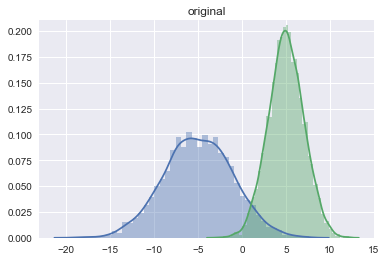

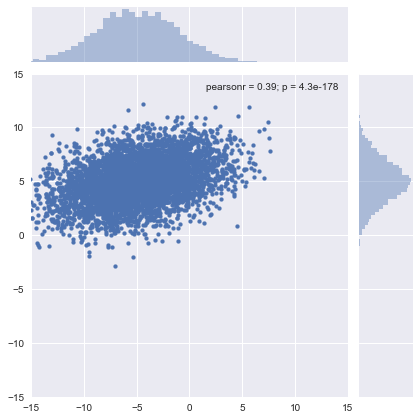

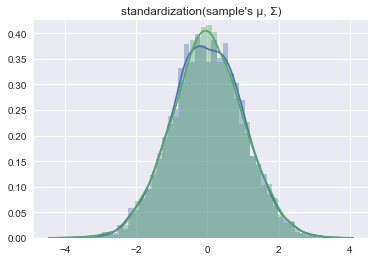

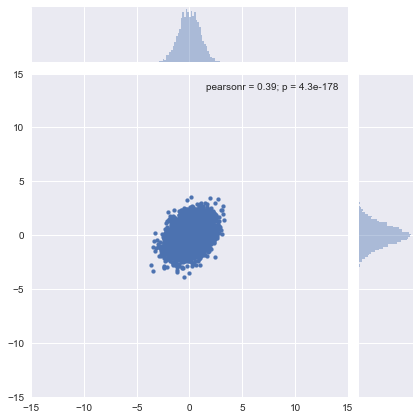

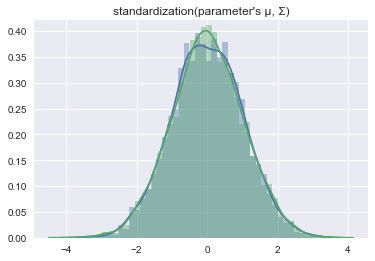

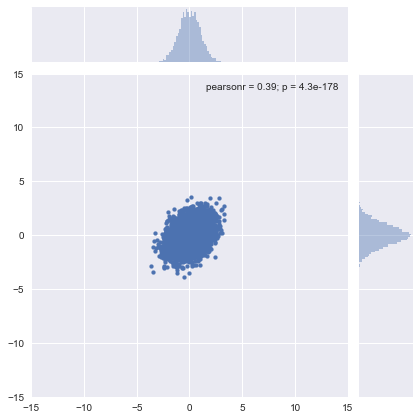

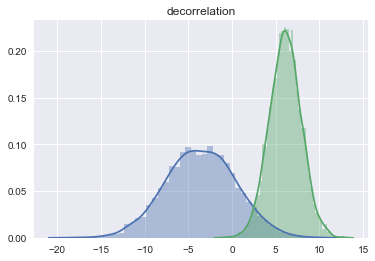

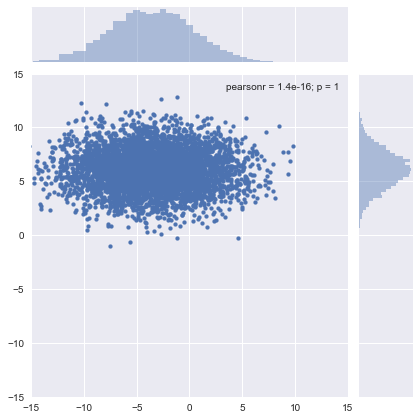

In [49]:
for title, method in methods.items():
    transformed_data = transform(data, title, method, mean, sigma)
    plot_data(transformed_data, title)